In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset and use only the first two features for visualization
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Dataset prepared and scaled.")

✅ Dataset prepared and scaled.


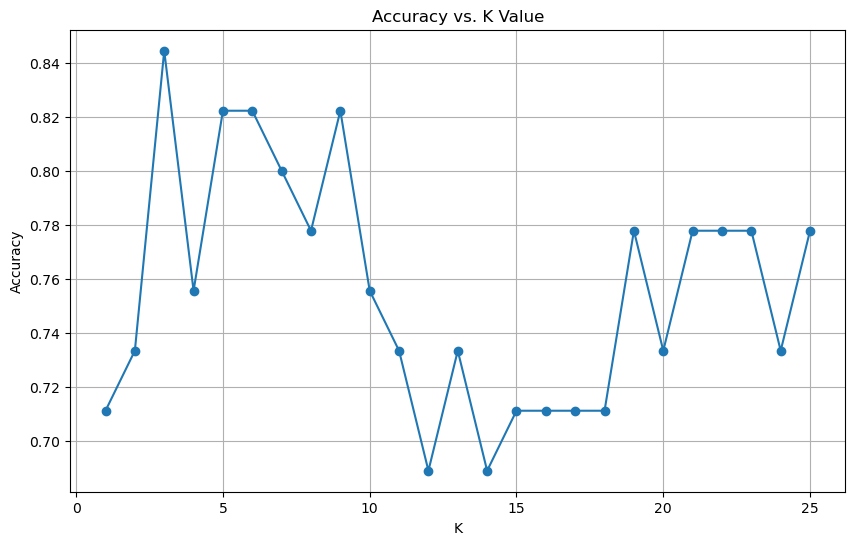

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Test a range of K values
k_range = range(1, 26)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot the results to find the optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Final Model Accuracy (K=7): 0.80


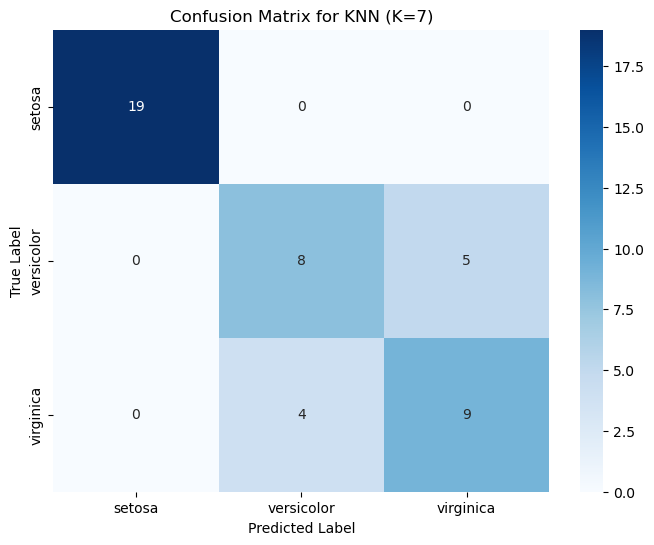

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train the final model with the best K
best_k = 7
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Evaluate the model
y_final_pred = final_knn.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_final_pred)
conf_matrix = confusion_matrix(y_test, y_final_pred)

print(f"Final Model Accuracy (K={best_k}): {final_accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for KNN (K={best_k})')
plt.show()

✅ Final KNN model trained.
Model Accuracy: 0.80
Generating decision boundary plot...


TypeError: 'ListedColormap' object is not iterable

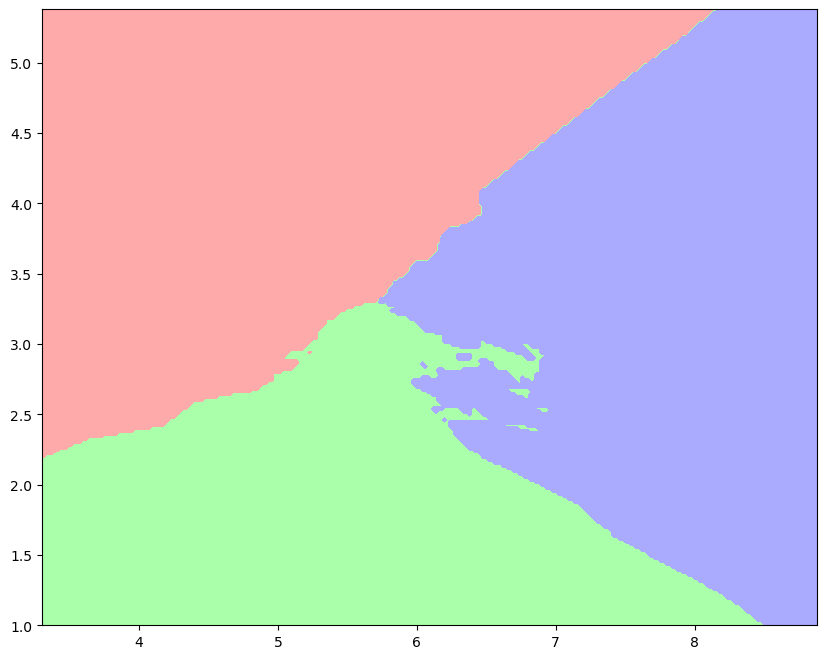

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# --- 1. Prepare Data (Ensuring NumPy arrays) ---
iris = load_iris()
# Use only the first two features for visualization
X = iris.data[:, :2]
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
# The scaler is now fitted on a NumPy array
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2 & 3. Train the Final Model (using best K=7) ---
final_knn = KNeighborsClassifier(n_neighbors=7)
final_knn.fit(X_train_scaled, y_train)
print("✅ Final KNN model trained.")

# --- 4. Evaluate (Optional, for confirmation) ---
y_pred = final_knn.predict(X_test_scaled)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")


# --- 5. Visualize Decision Boundaries (Corrected) ---
print("Generating decision boundary plot...")

# Create a colormap for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Define the plot boundaries based on the original (unscaled) data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Make predictions on every point of the grid
# IMPORTANT: We scale the grid points using the same scaler
Z = final_knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the final result
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Overlay the actual data points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")

